# Escola Politécnica da Universidade de São Paulo
<br>
<img src=https://raw.githubusercontent.com/lucaspenna00/EPsPoli/master/filtros_digitais/exp4/minerva.png>
<br>

## Engenharia de Sistemas Eletrônicos

<br>

### Processamento Estatístico de Sinais - Prof. Dr. Vitor H. Nascimento
### Autor: Lucas Penna Saraiva - 9770566

<br>
<br>

# Experiência 4: Densidade Espectral de Potência e Ruído de Quantização

<br>
<br>

## Introdução e Objetivos
O objetivo desse Exercício Programa 4 é estudar como os ruídos de quantização afetam o projeto de Filtros Digitais. Ao utilizarmos computadores modernos, o ruído de quantização é uma variável que afeta muito pouco a maioria dos projetos de filtros, a medida que temos a disposição computadores modernos, que dispõe de processadores com 64 bits de resolução. Entretanto, quando o problema se torna projetar circuitos do tipo Digital Signal Processor, em que em alguns casos (devido ao custo, consumo de energia ou outras limitações) precisa-se trabalhar com um número limitado de bits. 

Nessa condição, os efeitos da quantização passam a não ser despreziveis, constituindo-se componentes de ruído consideráveis no projeto. Assim, ao longo do desenvolvimento dessa experiência, pretende-se compreender como os efeitos da quantização afetam figuras de mérito fundamentais como a relação sinal-ruído SNR.

Dessa forma, ao longo do experimento, exploraremos alguns conceitos abordados no início do curso relacionados ao campo de Processos Estocásticos (verificação de estacionariedade, propriedades de sinais ergódicos, etc), bem como conhecimentos relacionados ao projeto de filtros digitais. Por fim, combinar esses dois conhecimentos para entender o comportamento e efeitos devido ao ruído de quantização nos sistemas projetados.

In [7]:
using PyPlot, FixedPointNumbers, EllipsisNotation, SampledSignals, PyCall, DSP, Polynomials, Statistics;

In [8]:
sig = pyimport("scipy.signal");
matplotlib = pyimport("matplotlib.pyplot")
include("fxfilt.jl");
matplotlib.style.use("dark_background")

Conforme especificado no enunciado, criaremos o sinal $$s(t)$$ amostrado a uma frequência de 40MHz com duração de 3s.

In [9]:
fo = 100π;
fa = 40e3;
Ta=1/fa;
n=0:Ta:3;
s = 0.5*cos.(2π*fo*n) + 0.4*cos.(4π*300*n) + 0.15*cos.(6π*fo*n);

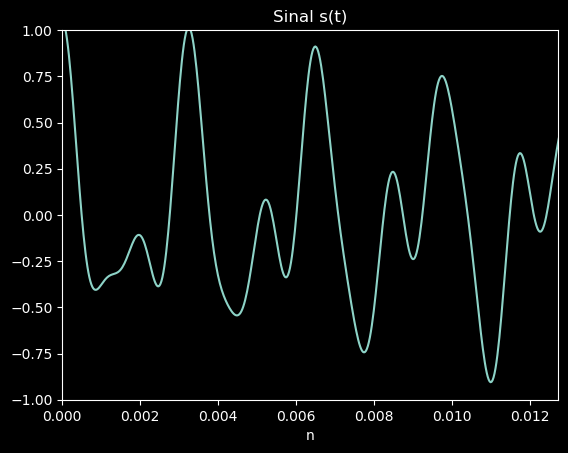

In [10]:
plot(n,s);
axis([0, 4/fo, -1, 1])
title("Sinal s(t)");
xlabel("n");

O comando Fixed{Int16, k} especifica números em ponto fixo usando k bits  direita da vırgula - então se você quer simular operações com numeros entre −1 e 1 com 5 bits, 1 bit é
para o sinal e 4 para a parte fracionaria.

In [11]:
sq = Fixed{Int16,4}.(s);

In [12]:
yq = SampleBuf(sq, fa)

120001-frame, 1-channel SampleBuf{Fixed{Int16,4}, 1}
3.000025s sampled at 40000.0Hz
████████████████████████████████████████████████████████████████████████████████

## Função fxfilt 

A função fxfilt basicamente calcula a saida de um filtro levando em consideração a quantização dos sinais dado um sinal de entrada e o coeficiente dos filtros projetos.
<br><br>
- Se a, b e x forem vetores de ponto flutuante, então a saída é calculada em ponto flutuante normalmente (e o resultado deveria ser o mesmo de se utilizar a função **filt** comum).
<br><br>
- Se b e a forem ponto flutuante e x for ponto fixo, então a saída é calculada em ponto fixo, mas utilizando os valores exatos dos coeficientes. A precisão da saída é sempre a mesma da entrada, x. Se precdupla=True, os cálculos intermediários são feitos em precisão dupla. Caso contrário, a saída de cada multiplicador é quantizada para a mesma precisão de X, sinal de entrada.


## Filtro IIR Aproximação Elíptica

Projetar um filtro IIR $H_{1}(z)$ usando a aproximação elíptica. Utilizou-se as funções **ellipord** e **ellip** para o projeto. As seguintes especificações de filtro foram definidas:

<br>
<br>

• Faixa de passagem: 0 ≤ ω ≤ ωp, <br><br>
• Faixa de rejeição: 0,2π rad/amostra = ωr ≤ ω ≤ π rad/amostra,<br><br>
• Atenuação mínima na faixa de rejeição: 40 dB,<br><br>
• Queda máxima na faixa de passagem δp = 0,05.<br><br>

Utilizando o critério de Nyquist, 
Deve-se escolher a frequência da banda de passagem conforme a máxima frequência presente no sinal.
Em que 1000Hz é aproximadamente a máx. frequência...

<img src=https://raw.githubusercontent.com/lucaspenna00/EPsPoli/master/filtros_digitais/exp4/nyquist_crit.png>

In [13]:
ωp = 0.1π # DEFINIR
ωr = 0.2π
δp = 0.05
δr = 0.01;

## Como funciona o filtro IIR Aproximação Elíptica?
<br>
<br>
Trata-se de um filtro com ondulações  na banda passante e na banda rejeitada. Isso significa que o filtro visa minimizar o erro máximo nas duas bandas, ao contrário do filtro de Chebyshev, que apresenta ripple somente na banda passante. O módulo da resposta em frequência do filtro passa-baixas elíptico pode ser escrita como:

$$ G_{n} = | H_{n}(j\omega)| = \frac{1}{\sqrt{1+\epsilon^{2} R^{2}_{n}(\omega)}}$$

Em que  $R^{2}_{n}(\omega)$ é a função racional de Chebyshev de ordem n.

In [14]:
N, Wn = sig.ellipord(ωp/π, ωr/π, -20*log10(1-δp), -20*log10(δr))

(4, 0.1)

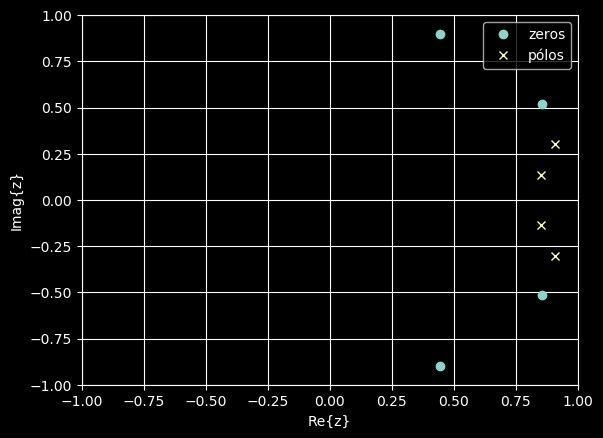

ganho= 0.012004547680162379

In [15]:
zpkellip = digitalfilter(Lowpass(Wn), Elliptic(N, -20*log10(1-δp),-20*log10(δr)))
print("ganho= ",zpkellip.k)
plot(real.(zpkellip.z),imag.(zpkellip.z),"o",label="zeros")
plot(real.(zpkellip.p),imag.(zpkellip.p),"x",label="pólos")
grid()
axis([-1,1,-1,1])
xlabel("Re{z}")
ylabel("Imag{z}")
legend();

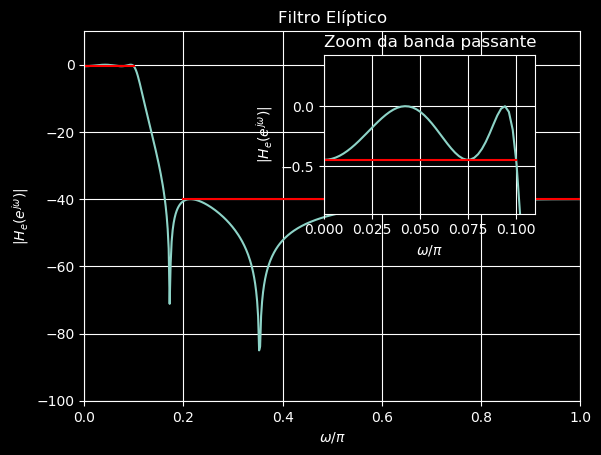

In [16]:
ω = range(0, π, length=500)
He = freqz(zpkellip, ω)
f=plt.figure()
plot(ω/π, amp2db.(abs.(He)))
plot([0;ωp/π],amp2db(1-δp)*[1;1],"r")
plot([ωr/π;1],amp2db(δr)*[1;1],"r")
xlabel(L"$\omega/\pi$")
ylabel(L"$|H_{e}(e^{j\omega})|$")
title("Filtro Elíptico")
axis([0, 1, -100, 10])
grid();
f.add_subplot(222,position=[0.5,0.5,0.33,0.33])
plot(ω/π, amp2db.(abs.(He)))
plot([0;ωp/π],amp2db(1-δp)*[1;1],"r")
xlabel(L"$\omega/\pi$")
ylabel(L"$|H_{e}(e^{j\omega})|$")
axis([0, 1.1ωp/π, 2*amp2db(1-δp), amp2db(1+δp)])
title("Zoom da banda passante")
grid();

# Tarefas

## Tarefa 1

Seja $y_{Q}[n]$ a saída do filtro IIR. Considerando o filtro implementado com
precisão infinita, determine a funcao valor esperado $$m_{yQ}
[n] = E{_{yQ}[n]}$$

Queremos calcular o valor quantizado de Y, dessa forma devemos utilizar o método filt.

In [17]:
a = coefa(zpkellip);
b = coefb(zpkellip);

B0 = 5

sq = Fixed{Int16,B0-1}.(s)

yq = filt(b, a, sq);

┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = fromroots(::Type{Poly}, ::Array{Complex{Float64},1}; var::Symbol) at Poly.jl:64
└ @ Polynomials.PolyCompat C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\polynomials\Poly.jl:64
┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly{Complex{Float64}}(::Array{Complex{Float64},1}, ::Symbol) at abstract.jl:45
└ @ Polynomials.PolyCompat C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\abstract.jl:45
┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly at Poly.jl:26 [inlined]
└ @ Core C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\polynomials\Poly.jl:26
┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly at Poly.jl:26 [inlined]
└ @ Core C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\polynomials\Poly.jl:26
┌ Warning: Use

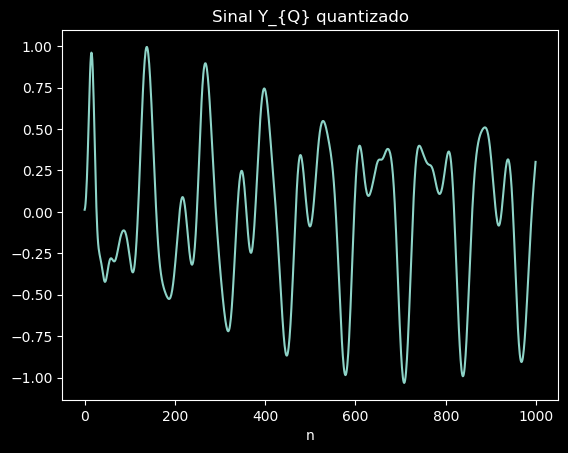

In [18]:
plot(yq[1:1000])
title("Sinal Y_{Q} quantizado")
xlabel("n");

Cálculo do valor esperado:

Como $$E[y_{Q}[n]] = E[y[n]] + E[erroquant]$$ Só que
 $$E[erroquant] = 0$$
 Pois é um ruído branco com média 0. Então: $$E[y_{Q}[n]] = E[y[n]]$$ Que por ser um sinal determinístico (não possuir nenhuma componente aleatória):
 $$E[y_{Q}[n]] = s$$

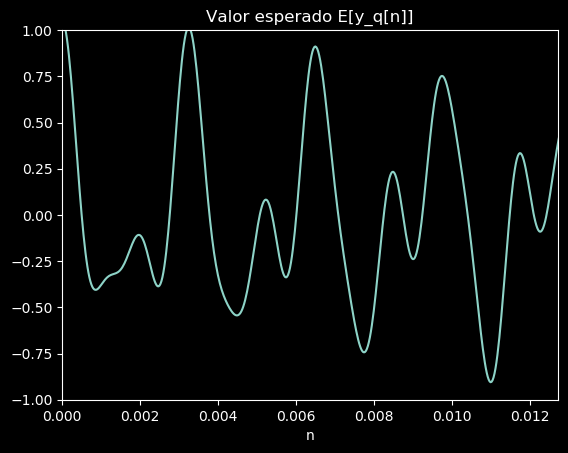

In [19]:
myq = s;
plot(n,s);
axis([0, 4/fo, -1, 1])
title("Valor esperado E[y_q[n]]");
xlabel("n");

## Tarefa 2
<br>
Defina $\epsilon_{Q}[n] = y_{Q}[n] - y[n]$. Esse sinal pode ser considerado um processo estacionário? Qual é o valor DC e a potência média de $\epsilon_{Q}[n]$? Calcule a SNR na saída. Você pode usar a função impz para calcular a resposta ao impulso do filtro IIR.


In [20]:
y = filt(b,a,s);

In [21]:
ϵ = yq - y;

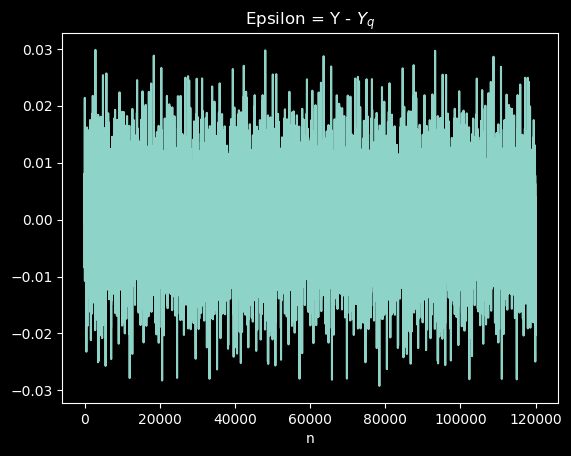

In [22]:
plot(ϵ)
title(L"Epsilon = Y - $Y_{q}$")
xlabel("n");

### 2.1 Verificação empírica da estacionariedade

Para que um processo seja estacionário no sentido amplo é necessário que as propriedades estatísticas não variem ao longo do tempo. Ou seja. Pegamos alguns intervalos de tempo e verificamos a distribuição. Espera-se que sejam semelhantes caso seja estacionário no sentido amplo.

Como podemos ver abaixo, os valores de média e std nos intervalos analisados praticamente não variam. Dessa forma podemos afirmar empiricamente que $\epsilon~_{Q}[n]$ é estacionário no sentido amplo.

In [23]:
parte_processo1 = ϵ[1:10000]
parte_processo2 = ϵ[10000:20000]
parte_processo3 = ϵ[20000:30000]
parte_processo4 = ϵ[30000:40000]
parte_processo5 = ϵ[40000:50000]
parte_processo6 = ϵ[50000:60000]
parte_processo7 = ϵ[60000:70000]
parte_processo8 = ϵ[70000:80000]
parte_processo9 = ϵ[80000:90000]
parte_processo10 = ϵ[90000:100000];

print("\n--Estatísticas dos intervalos do Processo---\n")
print("\nMedia P_Processo_1: ", mean(parte_processo1))
print("\nMedia P_Processo_2: ", mean(parte_processo2))
print("\nMedia P_Processo_3: ", mean(parte_processo3))
print("\nMedia P_Processo_4: ", mean(parte_processo4))
print("\nMedia P_Processo_5: ", mean(parte_processo5))
print("\nMedia P_Processo_6: ", mean(parte_processo6))
print("\nMedia P_Processo_7: ", mean(parte_processo7))
print("\nMedia P_Processo_8: ", mean(parte_processo8))
print("\nMedia P_Processo_9: ", mean(parte_processo9))
print("\nMedia P_Processo_10: ", mean(parte_processo10))
print("\n")
print("\nStd P_Processo_1: ", std(parte_processo1))
print("\nStd P_Processo_2: ", std(parte_processo2))
print("\nStd P_Processo_3: ", std(parte_processo3))
print("\nStd P_Processo_4: ", std(parte_processo4))
print("\nStd P_Processo_5: ", std(parte_processo5))
print("\nStd P_Processo_6: ", std(parte_processo6))
print("\nStd P_Processo_7: ", std(parte_processo7))
print("\nStd P_Processo_8: ", std(parte_processo8))
print("\nStd P_Processo_9: ", std(parte_processo9))
print("\nStd P_Processo_10: ", std(parte_processo10))


--Estatísticas dos intervalos do Processo---

Media P_Processo_1: 0.00010140460994327488
Media P_Processo_2: -0.00018880054918808277
Media P_Processo_3: 6.0164159083448e-5
Media P_Processo_4: 2.8466759194130273e-5
Media P_Processo_5: -7.784397653994074e-5
Media P_Processo_6: 1.4041197639664642e-5
Media P_Processo_7: -6.690958686570231e-6
Media P_Processo_8: -8.668631633579571e-5
Media P_Processo_9: 3.88501702003273e-5
Media P_Processo_10: 3.688718633205803e-5

Std P_Processo_1: 0.0065776372554182784
Std P_Processo_2: 0.006424368154417791
Std P_Processo_3: 0.0063610642503743545
Std P_Processo_4: 0.00641028308152326
Std P_Processo_5: 0.006661236697884805
Std P_Processo_6: 0.006423896734558074
Std P_Processo_7: 0.006393210841723773
Std P_Processo_8: 0.0064485925456072134
Std P_Processo_9: 0.006582163803323921
Std P_Processo_10: 0.006551932988729904

### 2.2 Cálculo do valor DC

O valor DC de $\epsilon$ pode ser calculado como:

$$ Valor_{DC} = E(\epsilon_{Q}[n]) $$

Basta calcular a média da realização.

In [24]:
print("Valor DC: ", mean(ϵ))

Valor DC: -1.5070411527242455e-5

### 2.3 Cálculo da Potência Média do Ruído

Aplicando o Teorema de Parseval, tem-se que a potência média do ruído pode ser descrita da seguinte forma:

$$ P_{\epsilon} =  {\sigma_{0}}^2 \sum_{n=0}^{oo} h^2 [n]$$

Para calcular a somatória infinita dos coeficientes da resposta ao impulso do filtro, pode-se utilizar os métodos combinados  

> **sum(impz(filtro))**

Conforme implementado abaixo. Note que a relação de igualdade escrita acima vale porque consideramos o filtro SLIT.

In [25]:
σ20 = (2.0^(-2B0))/3

PotRuido=σ20*sum(impz(zpkellip,500).^2)

print("\nPotencia do ruido teórica: ", PotRuido)


Potencia do ruido teórica: 3.390854202126148e-5

### 2.4 Cálculo da Relação Sinal/Ruído SNR

Para calcular a potência do sinal, utilizou-se a seguinte expressão:
$$P_{s} = \sum_{n=0}^{N} \frac{A_{n}²}{2}$$

Note que a potência do sinal de saída e de entrada podem ser consideradas iguais, assumindo a hipótese simplificadora de que o ganho do filtro na banda passante é constante igual a 1.

Assim, a relação SNR pode ser descrita como:

$$ SNR = \frac {Pot_{s}} {Pot_{\epsilon}} $$

Abaixo, utilizou-se o método **pow2db** para converter para decibeis.

In [26]:
potSinal = (0.5^2) + (0.4^2) + (0.15^2)

SNR = pow2db(potSinal/PotRuido)

print("\nSNR: ", SNR, " dB")


SNR: 41.05676995149656 dB

## Tarefa 3 

Use a funcao filter (Matlab) ou filt (Julia) para calcular a saıda
yQ[n] para uma realizacao do filtro, usando como entrada o sinal quantizado sq[n]. Use o conceito de ergodicidade para calcular a potencia
media do ruıdo na saıda do fil
tro, e compare com o valor teeorico do
item anterior (você pode considerar o ruıdo de quantizacao como sendo
um processo ergódico).

In [27]:
yq = filt(b, a, sq);
y = filt(b,a,s);

ϵ = yq - y;

### Tarefa 3.1 Cálculo da potência do ruído ergódico

Considerando o ruído ergódico, podemos calcular a potência do ruído utilizando a variância do sinal:

$$ P_{\epsilon} = \sigma²(\epsilon) $$

In [28]:
print("\nPotencia do ruido teórico: ", PotRuido)
print("\nPotencia do ruido experimental, utilizando ergodicidade: ", var(ϵ))


Potencia do ruido teórico: 3.390854202126148e-5
Potencia do ruido experimental, utilizando ergodicidade: 4.178967920222564e-5

Os dois principais motivos que podem ter levado à essa diferença é o fato de o filtro apresentar um ganho distorcido na banda de passagem, além dos erros naturalmente obtidos com a quantização finita.

## Tarefa 4

Use agora a função **filterfx.m** (Matlab) ou **fxfilt** (Julia) para gerar os sinais de saída considerando que o filtro seja implementado
usando aritmética de precisão finita com 12 bits para as contas (Use
Fixed{Int16,11} em Julia, para evitar overflow). Considere que cálculos
intermediários possam usar um registrador de precisão dupla. Quantize
os coeficientes com $$ Bc = 12 bits$$

Quantizando os coeficientes do filtro calculandos no item 1, utilizando B_filtro bits.

In [29]:
B_filtro = 12
a_q = Fixed{Int16,B_filtro-1}.(a);
b_q = Fixed{Int16,B_filtro-1}.(b);

Calculando as respostas ao impulso e de frequência, ambas quantizadas.

In [30]:
h_q = PolynomialRatio(b_q, a_q);
H_q = freqz(h_q,ω);

┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly at Poly.jl:26 [inlined]
└ @ Core C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\polynomials\Poly.jl:26
┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly at Poly.jl:26 [inlined]
└ @ Core C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\polynomials\Poly.jl:26
┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly{Fixed{Int16,11}}(::Array{Fixed{Int16,11},1}, ::Symbol) at abstract.jl:45
└ @ Polynomials.PolyCompat C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\abstract.jl:45


Visualizando a resposta em frequência do filtro quantizado.

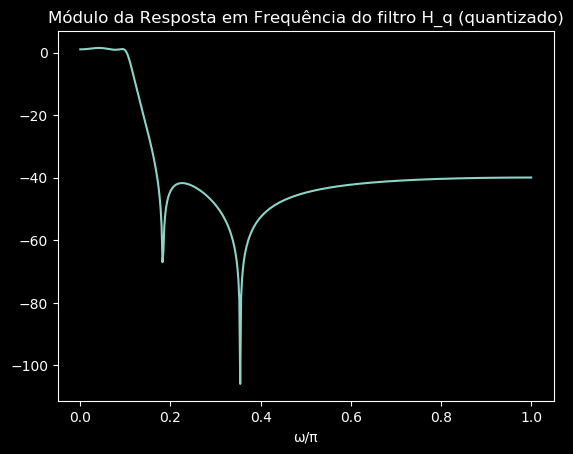

In [31]:
title("Módulo da Resposta em Frequência do filtro H_q (quantizado)");
plot(ω/π, amp2db.(abs.(H_q)));
xlabel("ω/π");

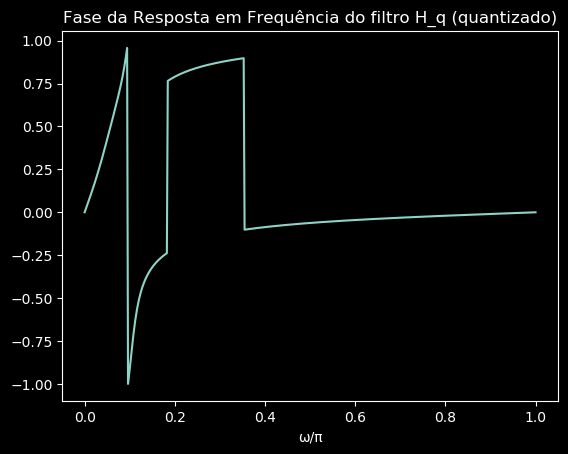

In [32]:
title("Fase da Resposta em Frequência do filtro H_q (quantizado)");
plot(ω/π, angle.(H_q)/π);
xlabel("ω/π");

### Tarefa 4.1 Obter saídas do filtro quantizado

Utilizando a função **fxfilter** para gerar os sinais de saída, considerando o filtro implementado em aritmética de precisão finita.
Faremos para dois casos: o sinal s quantizado (sq) e o sinal s puro.

In [33]:
y_quant_q = fxfilt(b_q, a_q, Fixed{Int16,B_filtro-1}.(sq), true); #precdupla=True
y_quant = fxfilt(b_q, a_q, Fixed{Int16,B_filtro-1}.(s), true); #precdupla=True

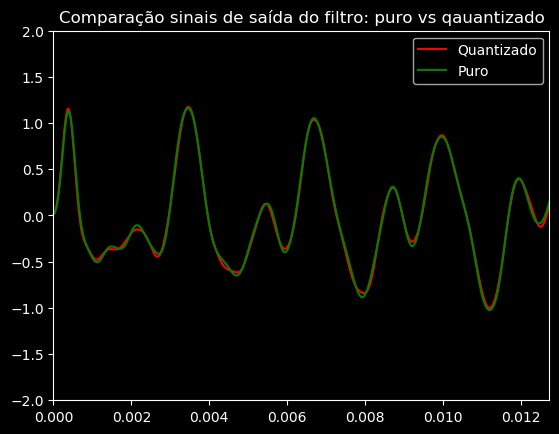

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [34]:
title("Comparação sinais de saída do filtro: puro vs qauantizado");
plot(n, y_quant_q, "r", label="Quantizado");
plot(n, y_quant, "g", label="Puro");
axis([0,4/fo,-2,2]);
legend();

## Tarefa 5 

Novamente, calcule o sinal **εT [n]** para este exemplo, use ergodicidade
para calcular a potência média e calcule a SNR de saída.

In [35]:
ϵT = y_quant_q - y_quant;

### Tarefa 5.1 Potência Média de EpsilonT

Utilizando ergodicidade, temos que:

$$Pot_{\epsilon T} = \sigma²(\epsilon T)$$
    
    

In [36]:
print("Potência experimental do ruído é: ", var(ϵT))

Potência experimental do ruído é: 0.0007977272497667314

### Tarefa 5.2 Relação Sinal/Ruído

Assumindo que a potência de entrada é igual a potência de saída, conforme discutido no item 2.4, temos que:

In [37]:
SNR = pow2db(potSinal/var(ϵT))
print("A relação SNR experimental calculada é, então: ", SNR, " dB")

A relação SNR experimental calculada é, então: 27.341316843212535 dB

## Tarefa 6

Para o caso do filtro implementado usando 12 bits do item anterior,
calcule teoricamente a potência média do ruído total na saída do filtro.
Leia a função filterfx.m (ou fxfilt) e considere exatamente como as
contas são feitas. Compare o resultado teórico com o do item anterior.

<img src=https://raw.githubusercontent.com/lucaspenna00/EPsPoli/master/filtros_digitais/exp4/filtro6.png>

A função **fxfilt** com precisão dupla codifica o filtro acima, na forma direta.
A expressão da potência média do ruído na saída pode ser obtida da seguinte maneira:

<img src=https://raw.githubusercontent.com/lucaspenna00/EPsPoli/master/filtros_digitais/exp4/deducao6.png>

Portanto, a ideia é calcular a potência teórica do ruído de saída, utilizando os métodos computacionais adequados para executar a soma infinita dos impulsos.

Obtendo a expressão do h2 quantizado:

In [38]:
h2_q = PolynomialRatio([1], a_q);
h1_q = PolynomialRatio(b_q, a_q);

┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly at Poly.jl:26 [inlined]
└ @ Core C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\polynomials\Poly.jl:26
┌ Warning: Use of `Poly` from v1.0 forward will require `using Polynomials.PolyCompat`
│   caller = Poly at Poly.jl:26 [inlined]
└ @ Core C:\Users\lucas\.julia\packages\Polynomials\ghqdF\src\polynomials\Poly.jl:26


### Tarefa 6.1 Cálculo SNR teórico

Dada a fórmula da potência do ruído na saída obtida acima, temos que:

In [39]:
potRuido_teorica = ((2.0^(-2*B0)/3.0)*(sum(impz(h1_q, 500).^2))) + ((2.0^(-2*B_filtro)/3.0)*(sum(impz(h2_q, 500).^2)))

SNR = pow2db(potSinal/potRuido_teorica)
print("A relação SNR teórica calculada é, então: ", SNR, " dB")

A relação SNR teórica calculada é, então: 32.011272121669734 dB

## Tarefa 7

Qual seria o resultado para o filtro IIR se fosse usada a forma direta
canônica vista em aula? (ou seja, aquela em que a parte com realimentação é feita antes da parte FIR, veja a apostila). Não é preciso implementar o filtro, apenas calcular o valor teórico da SNR.

<img src=https://raw.githubusercontent.com/lucaspenna00/EPsPoli/master/filtros_digitais/exp4/filtro7.png>

Pode-se obter a expressão da potência teórica na forma canônica a partir da dedução simplificada abaixo:

<img src=https://raw.githubusercontent.com/lucaspenna00/EPsPoli/master/filtros_digitais/exp4/deducao7.png>

### Tarefa 7.1 Cálculo SNR teórico na forma canônica

Assim, implementando-se a fórmula acima fazendo uso da soma de impulsos **sum(impz)**, temos que:

In [40]:
potRuido_teo_can = (((2.0^(-2B_filtro)+2.0^(-2*B0))/3.0)*sum(impz(h1_q,500).^2))+((2.0^(-2*B_filtro))/3.0);

SNR = pow2db(potSinal/potRuido_teo_can)
print("A relação SNR teórica na forma canônica calculada é, então: ", SNR, " dB")

A relação SNR teórica na forma canônica calculada é, então: 39.66262532385788 dB

## Tarefa 8

Converta o filtro para seções de segunda ordem, como no exemplo mostrado em aula, passe o sinal quantizado pelo filtro implementado usando B = 12 bits e Bc = 12 bits novamente. Use os programas **filterfx.m** ou **fxfilt** para implementar cada uma das seções.

A ideia aqui é converter o filtro que antes possuia ordem 4 em duas seções de 2 ordens cada, cascateadas. Para implementar essa conversão pode-se utilizar o método **convert(SecondOrderSections, zpkellip)**. Ele aplicará a conversão da estrutura do filtro tomando o filtro elíptico projetado lá no começo.

Convertendo o filtro para 2° ordem:


In [70]:
# Fonte: notebook do prof. Vitor
zpkellip_2ord = convert(SecondOrderSections, zpkellip);
num_sections = length(zpkellip_2ord.biquads);
g = zpkellip_2ord.g;

Criando vetores de coeficientes do filtro:

In [71]:
a_2ord = Vector{Vector{Float64}}(undef,num_sections);
b_2ord = Vector{Vector{Float64}}(undef,num_sections);
a_q2ord = Vector{Vector{Fixed{Int16,B_filtro-1}}}(undef, num_sections);
b_q2ord = Vector{Vector{Fixed{Int16,B_filtro-1}}}(undef, num_sections);

## 8.1 Cálculo dos Coeficientes do Filtro

In [73]:
Hsosq = Complex.(ones(length(ω)))

for k=1:num_sections
 b_2ord[k] = coefb(zpkellip_2ord.biquads[k]);
 a_2ord[k] = coefa(zpkellip_2ord.biquads[k]);
 b_q2ord[k] = Fixed{Int16, B_filtro-1}.(b_2ord[k].*(g.^(1/num_sections))); # Experimentar colocar o ganho todo numa única seção :)
 a_q2ord[k] = Fixed{Int16, B_filtro-1}.(a_2ord[k]);
 Hsosq .= Hsosq .* freqz(PolynomialRatio(b_q2ord[k],a_q2ord[k]), ω);
end;

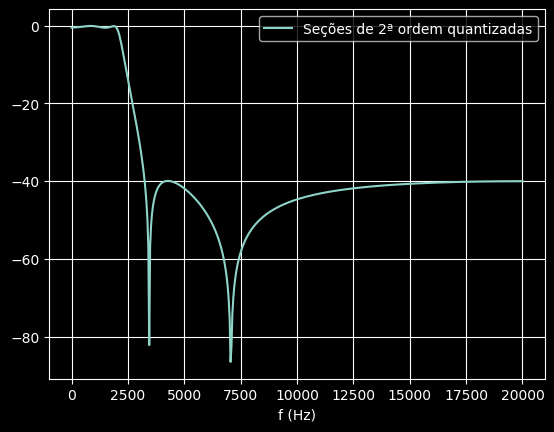

In [75]:
plot(ω*fa/(2π), amp2db.(abs.(Hsosq)),label="Seções de 2ª ordem quantizadas")
grid()
legend()
xlabel("f (Hz)");

## 8.2 Passando o sinal quantizado pelo filtro implementado

Podemos ver, no gráfico de saída, que o sistema projetado tem uma ótima performance, a medida que a saída quantizada possui diferenças imperceptíveis comparada com a saída limpa.

In [77]:
B = 12
sqsos = fxfilt(b_q2ord[1],a_q2ord[1],Fixed{Int16,B-1}.(sq))
ssos = fxfilt(b_q2ord[1], a_q2ord[1], s)
precdupla = true
for k=2:num_sections
 sqsos = fxfilt(b_q2ord[k], a_q2ord[k],Fixed{Int16,B-1}.(sqsos), precdupla)
 ssos = fxfilt(b_q2ord[k], a_q2ord[k], ssos)
end

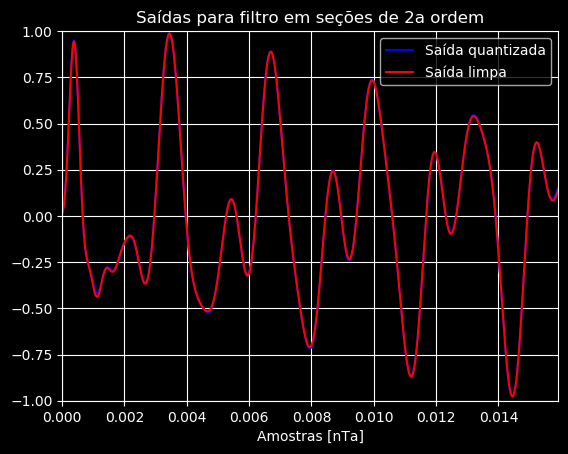

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [78]:
plot(n, sqsos, "b", label="Saída quantizada");
plot(n, ssos, "r", label="Saída limpa");
grid();
legend();
axis([0,5/fo,-1,1]);
xlabel("Amostras [nTa]");
title("Saídas para filtro em seções de 2a ordem");

Pode-se ainda escutar o sinal quantizado no player abaixo...

In [79]:
ysos = SampleBuf(sqsos,fa)

120001-frame, 1-channel SampleBuf{Fixed{Int16,11}, 1}
3.000025s sampled at 40000.0Hz
████████████████████████████████████████████████████████████████████████████████

## Tarefa 9
Calcule a potência do ruído na saída de modo experimental e também teoricamente.


# Ref. Bibliográfica
<br>
<br>

- Notas de Aula da disciplina PSI3431 Processamento Estatístico de Sinais, Prof. Dr. Vitor H. Nascimento. Escola Politécnica da USP.